# Funciones de densidad y distribución

Adaptamos la función que tenemos para que acepte las funciones encargadas de calcular la densidad, cuartil y la distribución como parámetros.

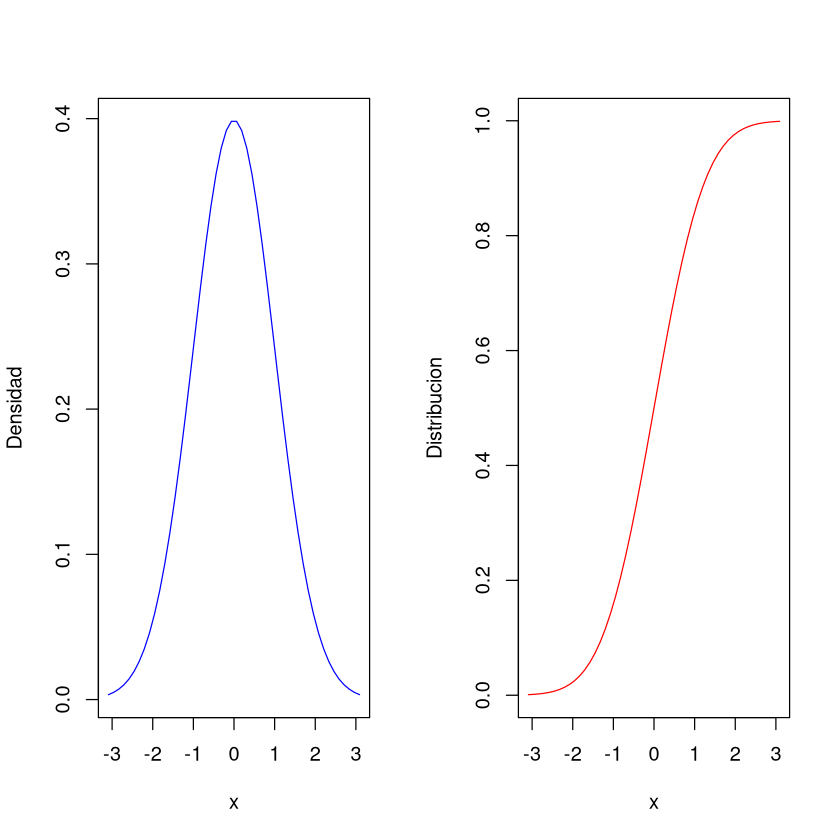

In [15]:
Dibuja <- function(n = 50, alfa = .001, qfunc = qnorm, dfunc = dnorm, pfunc = pnorm) {
    # Dibuja la funcion de densidad
    # y la de distribucion de la distribución dada por las funciones de los parámetros.
    # qfunc - Función cuantil
    # dfunc - Función de densidad.
    # pfunc - Funcion de distribución.
    
    # Por defecto toma los valores de la normal.
    n <- as.integer(n)
    if (n < 10) 
        stop("Hacen falta mas numeros")
    a <- qfunc(alfa)
    b <- qfunc(1-alfa)
    par(mfrow=c(1,2))
   
    x <- seq(a,b,,n)
    plot(x,dfunc(x), type="l", col="blue",ylab="Densidad")
    plot(x,pfunc(x), type="l", col="red",ylab="Distribucion")
    
}
Dibuja()

Las funciones correspondientes para la uniforme son `dunif`, `qunif` y `punif`.

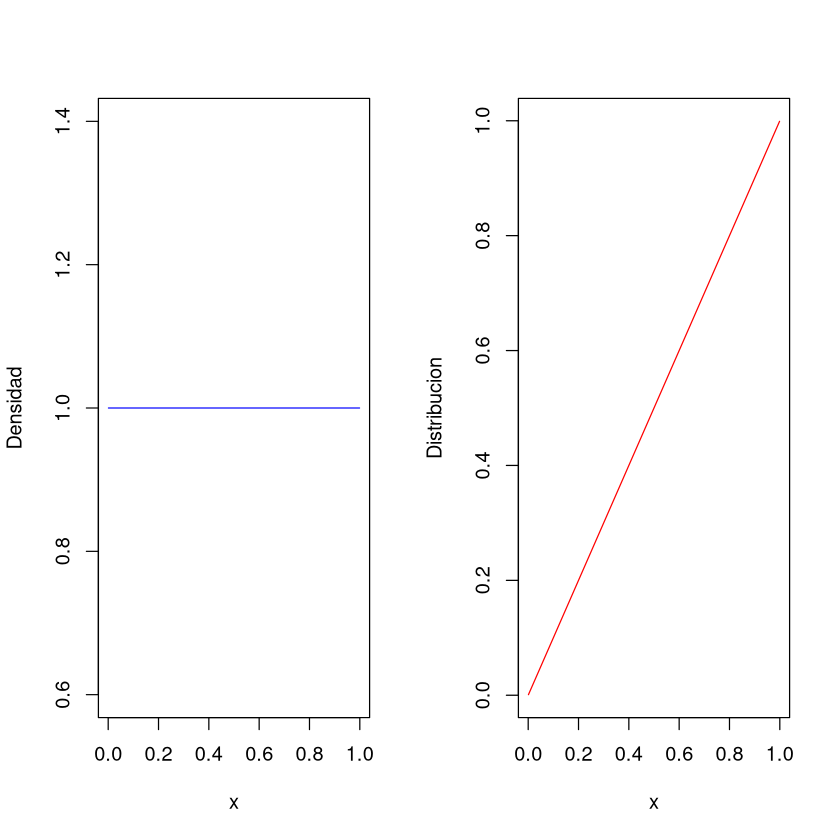

In [16]:
Dibuja(dfunc = dunif, qfunc = qunif, pfunc=punif)

Las mismas funciones sobre la distribución beta son `dt`, `pt` y `qt`, donde el parámetro df indica los grados de libertad. 

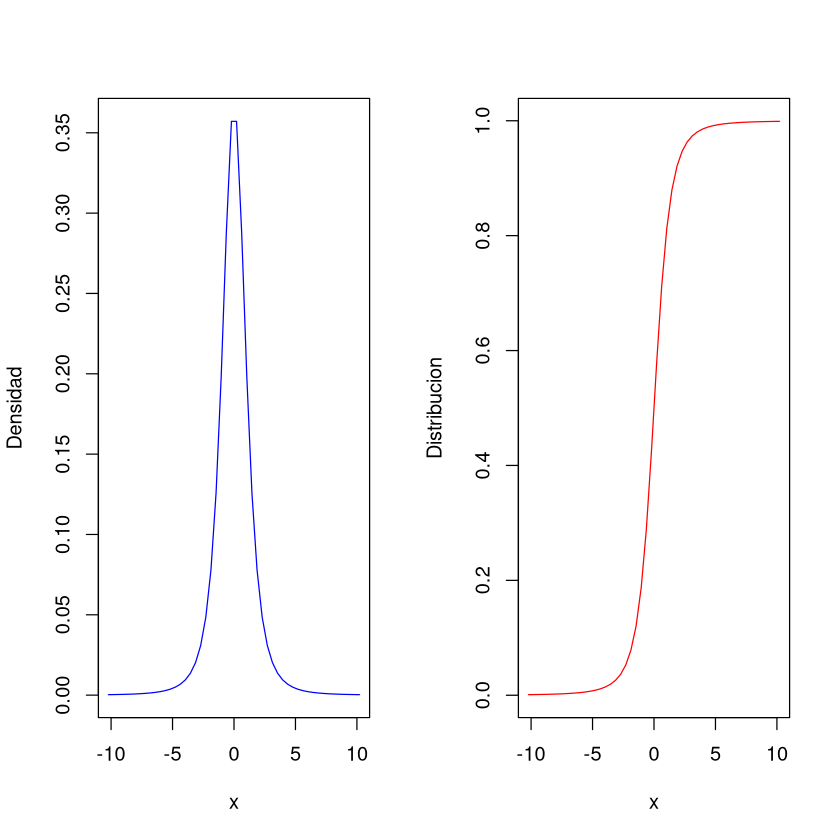

In [17]:
Dibuja(dfunc = function(x) dt(x, df = 3), 
       qfunc = function(x) qt(x, df = 3), 
       pfunc = function(x) pt(x, df = 3))

# Estadística Descriptiva

Utilizamos la base de datos de Iris para las pruebas que vamos a realizar de ahora en adelante.

In [18]:
data("iris")
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Utilizamos la función `sumary` para mostrar información resumida del conjunto de datos. Entre esta información encontramos:
+ El mínimo.
+ El máximo.
+ La media.
+ La mediana.
+ El primer y tercer cuartil.

De las 4 características de la base de datos.
Además nos hace un recuento de cuantas muestras de cada clase tenemos.

In [19]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Utilizamos la funcion `hist` para mostrar los histogramas de las 4 características.

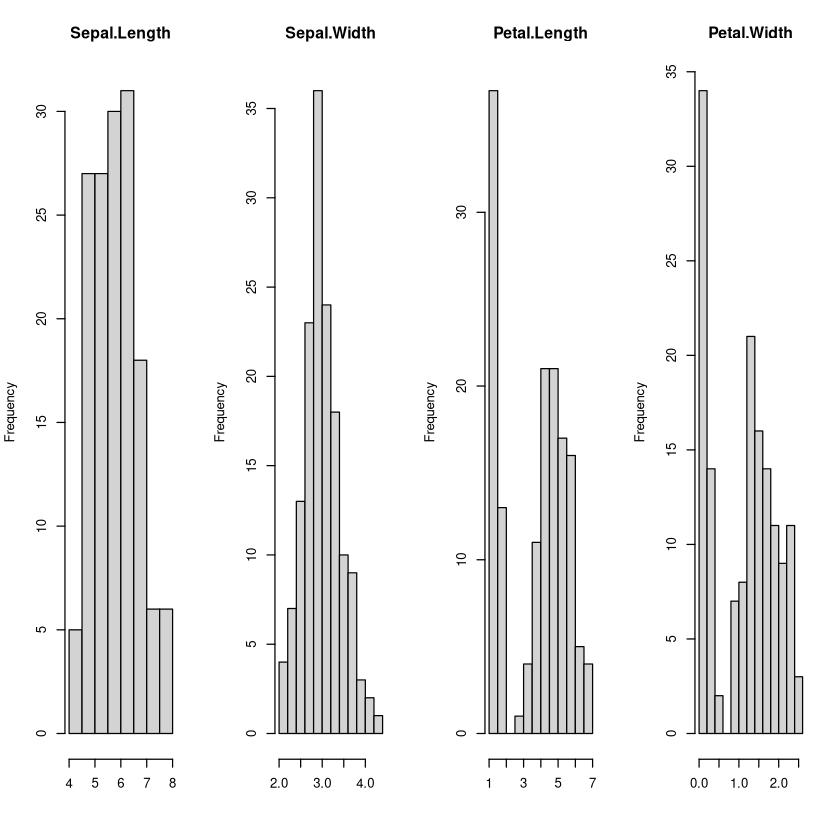

In [20]:
par(mfrow=c(1,4))
for (i in 1:4){
    hist(iris[,i], main = names(iris)[i], xlab = NULL)
}

También podemos pintar los diagramas de caja de las variables, separando en las clases que tenemos.

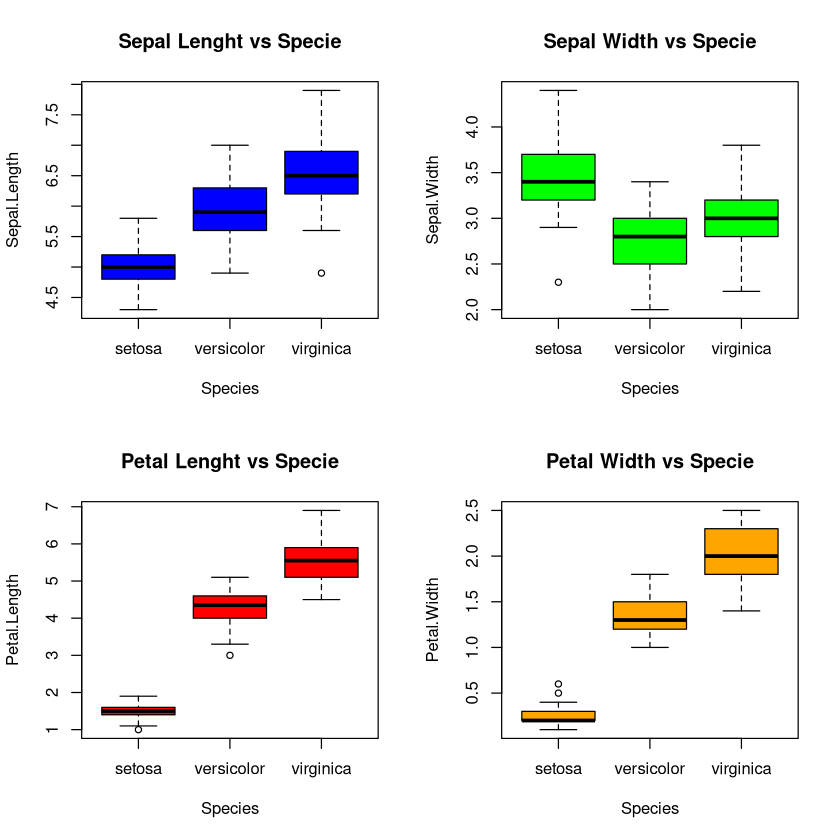

In [21]:
par(mfrow=c(2,2))
boxplot(Sepal.Length ~ Species, iris,
  main = "Sepal Lenght vs Specie", col = "blue")
boxplot(Sepal.Width ~ Species, iris,
  main = "Sepal Width vs Specie", col = "green")
boxplot(Petal.Length ~ Species, iris,
  main = "Petal Lenght vs Specie", col = "red")
boxplot(Petal.Width ~ Species, iris,
  main = "Petal Width vs Specie", col = "orange")

Con la función `stem` podems pintar un diagrama de tallos y hojas de un conjunto de datos.

In [22]:
stem(iris[,3])


  The decimal point is at the |

  1 | 012233333334444444444444
  1 | 55555555555556666666777799
  2 | 
  2 | 
  3 | 033
  3 | 55678999
  4 | 000001112222334444
  4 | 5555555566677777888899999
  5 | 000011111111223344
  5 | 55566666677788899
  6 | 0011134
  6 | 6779



Para hallar la media, varianza y mediana podemos utilizar `mean`, `var` y `median` respectivamente (ademas de usar `summary`).

In [23]:
for (i in 1:4){
    cat("Información sobre: ", names(iris)[i], "\n")
    cat("\tMedia: ", mean(iris[,i]),"\n")
    cat("\tVarianza: ", var(iris[,i]),"\n")
    cat("\tMediana: ", median(iris[,i]),"\n")
}

Información sobre:  Sepal.Length 
	Media:  5.843333 
	Varianza:  0.6856935 
	Mediana:  5.8 
Información sobre:  Sepal.Width 
	Media:  3.057333 
	Varianza:  0.1899794 
	Mediana:  3 
Información sobre:  Petal.Length 
	Media:  3.758 
	Varianza:  3.116278 
	Mediana:  4.35 
Información sobre:  Petal.Width 
	Media:  1.199333 
	Varianza:  0.5810063 
	Mediana:  1.3 


# t-Test

Un `t-test` es cualquier prueba en la que el estadístico utilizado tiene una distribución t de Student si la hipótesis nula es cierta. 

La función de `R` con el mismo nombre realiza un `t-test` sobre la hipótesis nula "Ambos conjuntos tienen la misma media". Se asume que ambos conjuntos siguen distribuciones normales con misma varianza (se puede cambiar con el parámetro var.equal).

Cuando solo se especifica un conjunto, se asume que la media del segundo es 0.
Los parámetros de la función son los siguientes:

`t.test(x, y = NULL, alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95, …)`

- `x`: Un vector no vacio de datos.
- `y`: Un vector opcional no vacio de datos. Cuando no se especifica, el test se realiza asumiento que la media es 0.
- `alternate`: Un carácter especificando la hipótesis alternativa. Puede ser `t` para indicar que las medias son distintas, `g` para indicar que la media del primer conjunto es mayor que la del segundo o `l` para indicar lo contrario. 
- `mu`: Número indicando el verdadero valor de la media (o diferencia de estas).
- `paired`: Valor lógico indicando si se debe utilizar el conjunto `y`.
- `var.equal`: Variable lógica indicando si si se debe considerar que ambas varianzas con iguales.
- `conf.level`: Nivel de confianza del intervalo.

Veamos los resultados obtenidos con una de las propiedades de Iris.

In [24]:
t.test(iris[,1])


	One Sample t-test

data:  iris[, 1]
t = 86.425, df = 149, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 5.709732 5.976934
sample estimates:
mean of x 
 5.843333 


Como obtenemos un p-value menor al nivel de confianza (por defecto 0.05), rechazamos la hipótesis nula (que la media sea 0).

Obtenemos además un intervalo de confianza (al 95%) para la media.

Buscamos ahora hacer un t-test de la siguiente hipótesis nula: *La diferencia de las médias de lsa longitudes de los sépalos en la Iris setosa y la virginica es 0*. Comenzamos suponiendo que ambas tienen la misma varianza.

In [25]:
a = iris[iris[, 5] == "setosa", 1]
b = iris[iris[, 5] == "virginica", 1]
t.test(a, b, var.equal=T)


	Two Sample t-test

data:  a and b
t = -15.386, df = 98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.786042 -1.377958
sample estimates:
mean of x mean of y 
    5.006     6.588 


Podemos suponer ahora que no tienen la misma varianza.

In [26]:
t.test(a, b, var.equal=F)


	Welch Two Sample t-test

data:  a and b
t = -15.386, df = 76.516, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.78676 -1.37724
sample estimates:
mean of x mean of y 
    5.006     6.588 


En ambos casos obtenemos un p.value bajo luego volvemos a rechazar la hipótesis nula.

Podemos hacer el mismo test sobre la varianza en lugar de las medias, utilizando `var.test`

In [27]:
var.test(a,b)


	F test to compare two variances

data:  a and b
F = 0.30729, num df = 49, denom df = 49, p-value = 6.366e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1743776 0.5414962
sample estimates:
ratio of variances 
         0.3072862 


# Regresión

Utilizamos la función `pairs` para ver que pareja de variables es más adecuada para un problema de regresión lineal.

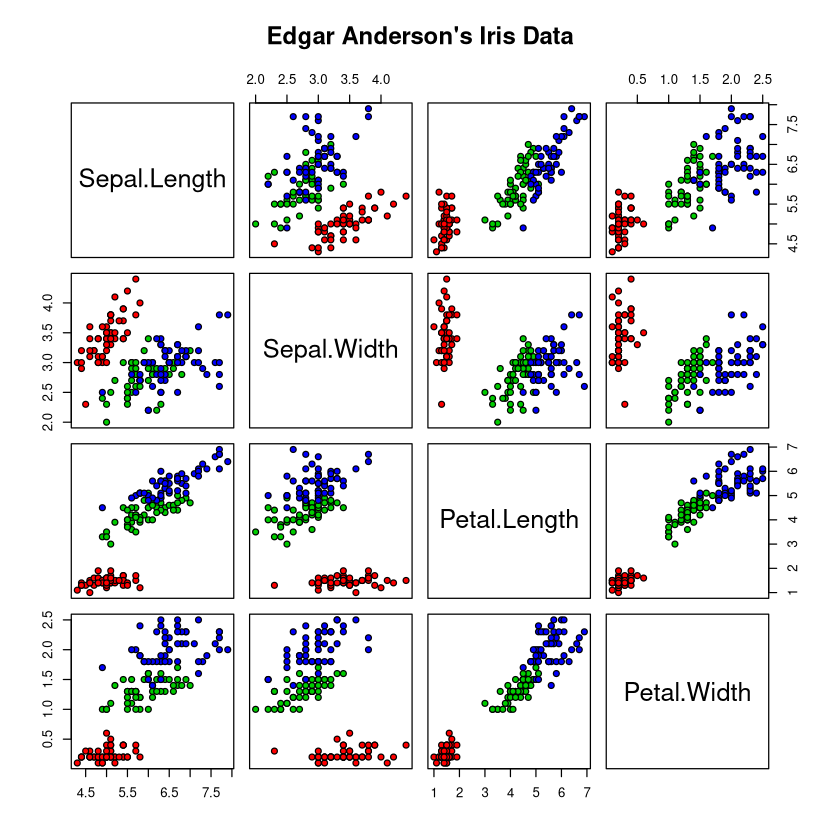

In [28]:
pairs(iris[1:4], main = "Edgar Anderson's Iris Data", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])

Como se puede observar `Petal.Lenght` y `Petal.Width` son las más adecuadas.

Para entrenar un modelo de regresión lineal utilizamos la función

`lm(formula, data, subset, weights, …)`

- `formula`: Un objeto de la clase "formula", descripción simbólica del modelo a ajustar.
- `data`: Data-frame o lista opcional conteniendo las variables del modelo.
- `subset`: Vector opcional especificando un subconjunto de observaciones a utilizar durante el ajuste.
- `weights`: Vector de pesos opcional a utilizar durante el proceso de ajuste.

In [29]:
lm(Petal.Width ~ Petal.Length, data=iris)$coefficients

(Intercept) Petal.Length 
  -0.3630755    0.4157554

Podemos utilizar los coeficientes obtenidos para pintar la recta de regresión junto con los datos. Para ello utilizamos la función `abline` que nos permite pintarla a partir de los valores de la pendiente y su corte con el eje de ordenadas.

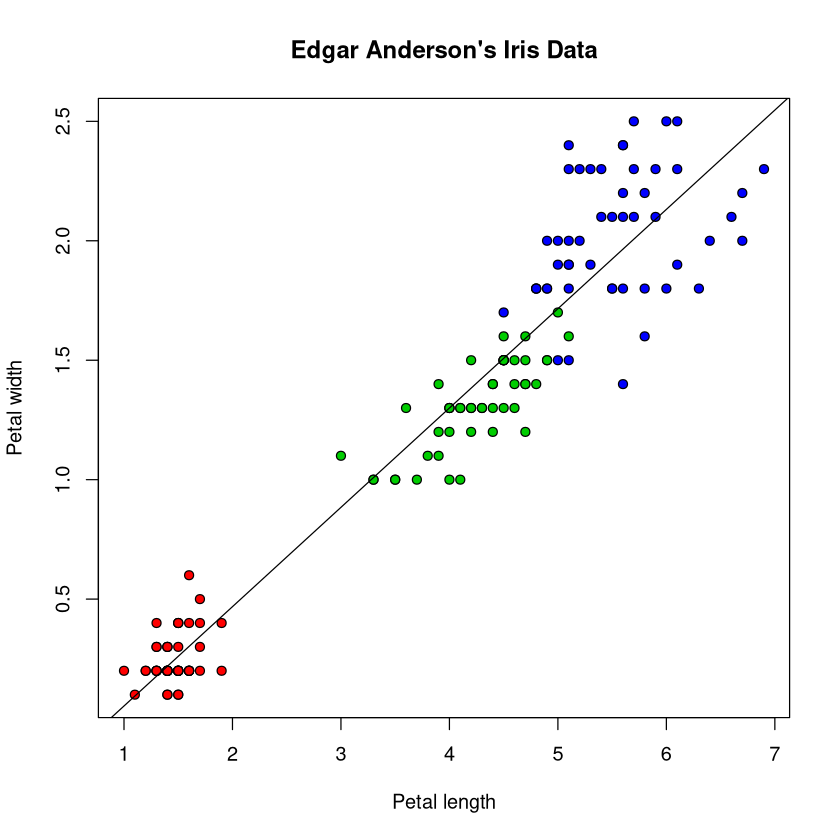

In [30]:
plot(iris$Petal.Length, iris$Petal.Width, pch=21, bg=c("red","green3","blue")[unclass(iris$Species)], main="Edgar Anderson's Iris Data", xlab="Petal length", ylab="Petal width")
abline(lm(Petal.Width ~ Petal.Length, data=iris)$coefficients, col="black")

Con `summary` podemos ver información sobre la regresión realizada, entre ella la distribución de los residuos, los coeficientes o el valor de $R^2$, vemos que este último es `0.9271` lugeo el ajuste es bueno.

In [31]:
summary(lm(Petal.Width ~ Petal.Length, data=iris))


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56515 -0.12358 -0.01898  0.13288  0.64272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.363076   0.039762  -9.131  4.7e-16 ***
Petal.Length  0.415755   0.009582  43.387  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2065 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


Podemos usar `plot` sobre la regresión para ver gráficas relacionadas con los residuos.

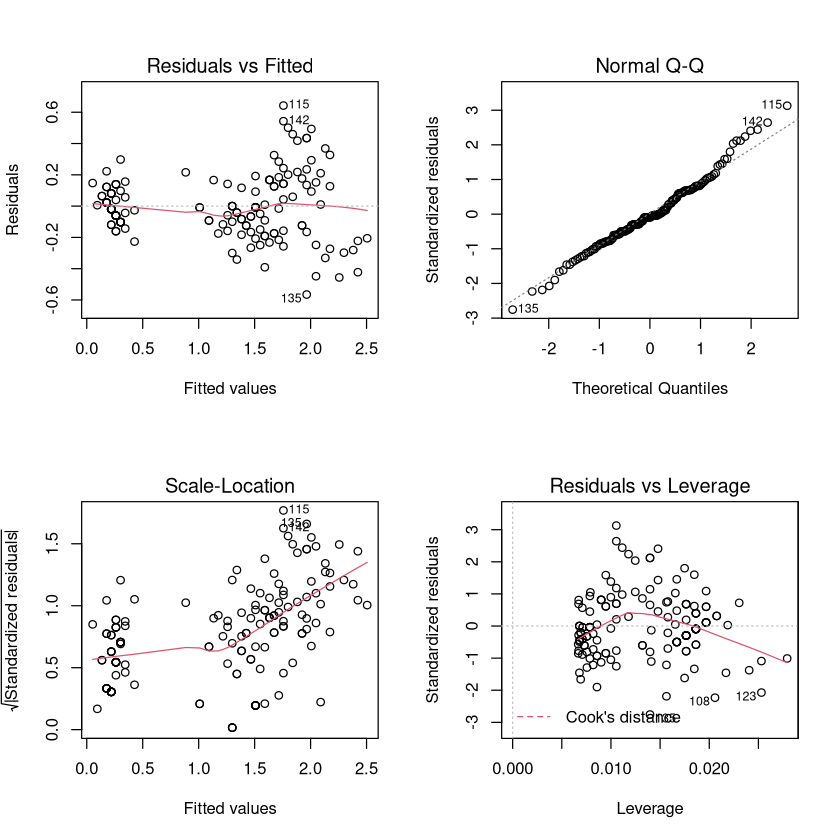

In [33]:
par(mfrow = c(2, 2))
plot(lm(Petal.Width ~ Petal.Length, data=iris))